# Brain Tumor - Data Exploration

In [1]:
# Let's check how many files we have, the input size of the file, and the distribution of the classification
import os
import cv2
import random
import matplotlib.pyplot as plt

# Path to image folder
train_image_folder = 'datasets/brain-tumor/train/images'
val_image_folder = 'datasets/brain-tumor/valid/images'

# Set to store unique image sizes
unique_sizes = set()

# Loop through all files in the training folder
for filename in os.listdir(train_image_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Adjust for image formats
        image_path = os.path.join(train_image_folder, filename)
        
        # Read image with OpenCV
        train_image = cv2.imread(image_path)
        height, width, channels = train_image.shape

        # Add the size to the set (set will ensure uniqueness)
        unique_sizes.add((width, height))

# Loop through all files in the validation folder
for filename in os.listdir(val_image_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Adjust for image formats
        image_path = os.path.join(val_image_folder, filename)
        
        # Read image with OpenCV
        val_image = cv2.imread(image_path)
        height, width, channels = val_image.shape

        # Add the size to the set (set will ensure uniqueness)
        unique_sizes.add((width, height))
        
# Print the unique sizes
for size in unique_sizes:
    print(f"Width: {size[0]}, Height: {size[1]}")


Width: 240, Height: 320
Width: 416, Height: 512
Width: 512, Height: 512
Width: 448, Height: 512
Width: 224, Height: 256
Width: 192, Height: 256
Width: 480, Height: 512
Width: 320, Height: 320
Width: 256, Height: 256
Width: 320, Height: 384


In [2]:
# Find the distribution of the classes in the training data

# Path to your labels folder
train_labels_folder = 'datasets/brain-tumor/train/labels'

# Initialize counters for tumor (1) and non-tumor (0)
tumor_count = 0
non_tumor_count = 0

# Loop through all text files in the folder
for filename in os.listdir(train_labels_folder):
    if filename.endswith('.txt'):
        label_file_path = os.path.join(train_labels_folder, filename)
        
        # Open and read the content of the label file
        with open(label_file_path, 'r') as file:
            # Read the first line (assuming there's only one line per file)
            line = file.readline().strip()
            
            # Split the line into values
            values = line.split()
            
            # First value is the class (1 for tumor, 0 for non-tumor)
            label = int(values[0])
            
            # Count the label occurrences
            if label == 1:
                tumor_count += 1
            elif label == 0:
                non_tumor_count += 1

# Print the distribution
print(f"Tumor (1): {tumor_count}")
print(f"Non-Tumor (0): {non_tumor_count}")


Tumor (1): 459
Non-Tumor (0): 419


In [3]:
# Find the distribution of the classes in the validaiton data

# Path to your labels folder
val_labels_folder = 'datasets/brain-tumor/valid/labels'

# Initialize counters for tumor (1) and non-tumor (0)
tumor_count = 0
non_tumor_count = 0

# Loop through all text files in the folder
for filename in os.listdir(val_labels_folder):
    if filename.endswith('.txt'):
        label_file_path = os.path.join(val_labels_folder, filename)
        
        # Open and read the content of the label file
        with open(label_file_path, 'r') as file:
            # Read the first line (assuming there's only one line per file)
            line = file.readline().strip()
            
            # Split the line into values
            values = line.split()
            
            # First value is the class (1 for tumor, 0 for non-tumor)
            label = int(values[0])
            
            # Count the label occurrences
            if label == 1:
                tumor_count += 1
            elif label == 0:
                non_tumor_count += 1

# Print the distribution
print(f"Tumor (1): {tumor_count}")
print(f"Non-Tumor (0): {non_tumor_count}")

Tumor (1): 81
Non-Tumor (0): 142


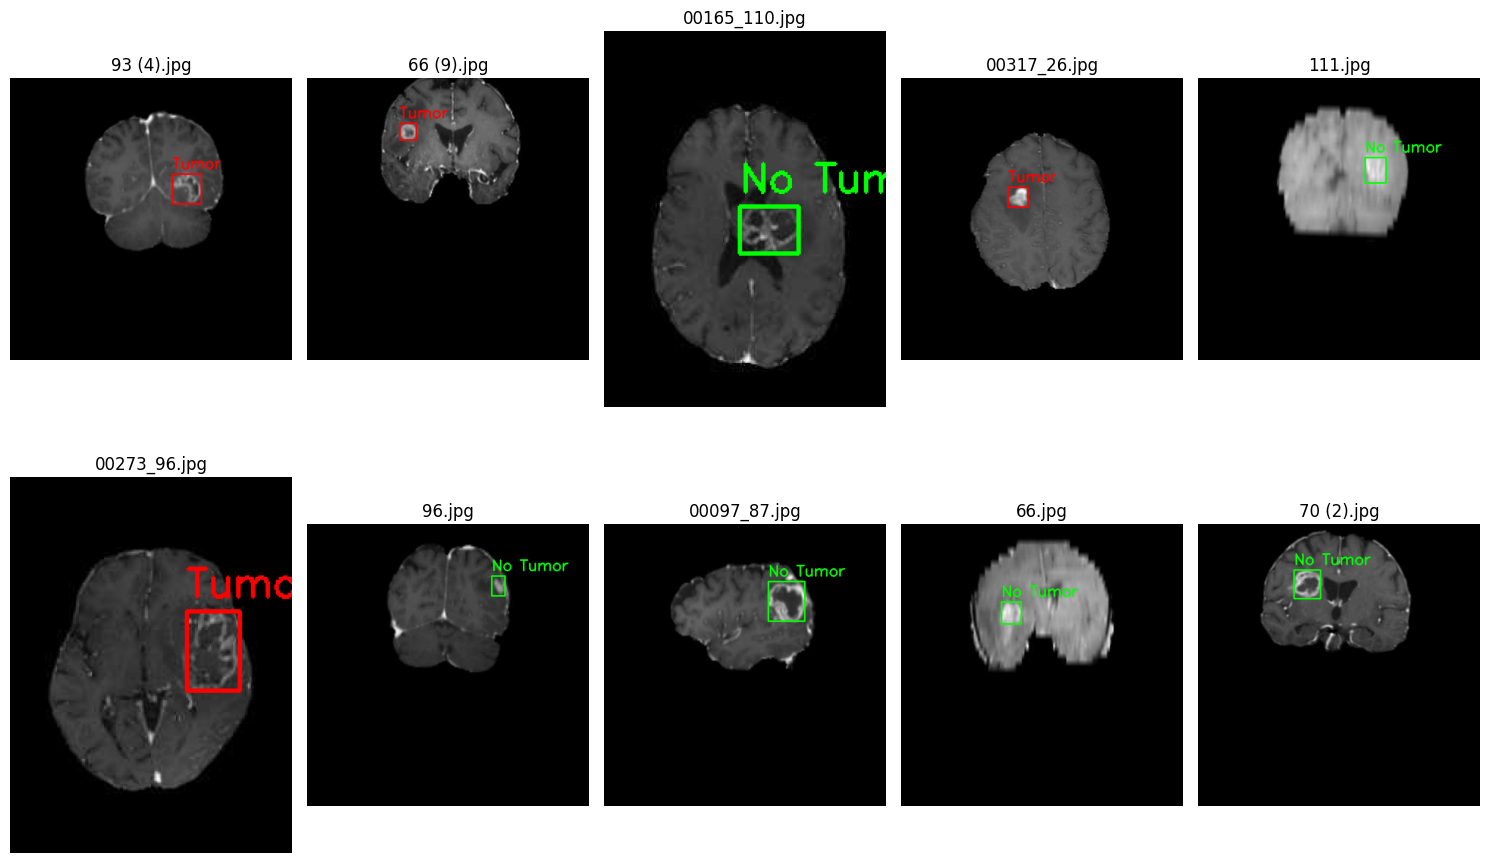

In [11]:
# Path to your training dataset
train_image_folder = 'datasets/brain-tumor/train/images'

# Get all image files in the folder
image_files = [f for f in os.listdir(train_image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select 10 images
random_images = random.sample(image_files, min(10, len(image_files)))

# Display images with labels and bounding boxes
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(train_image_folder, img_name)
    label_path = os.path.join(train_labels_folder, img_name.rsplit('.', 1)[0] + '.txt')
    
    # Read and process image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Draw bounding boxes if label file exists
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                data = line.strip().split()
                classification = int(data[0])
                x_center, y_center, width, height = map(float, data[1:])
                
                # Convert normalized coordinates to pixel values
                h, w, _ = img.shape
                x_center, y_center = int(x_center * w), int(y_center * h)
                width, height = int(width * w), int(height * h)
                
                # Calculate box coordinates
                x1, y1 = x_center - width // 2, y_center - height // 2
                x2, y2 = x_center + width // 2, y_center + height // 2
                
                # Draw bounding box
                color = (255, 0, 0) if classification == 1 else (0, 255, 0)
                label = 'Tumor' if classification == 1 else 'No Tumor'
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')

plt.tight_layout()
plt.show()